## Facet shape extraction - test notebook

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Functions underpinning facet reading, cutting out, and plotting

In [2]:
def read_XYZ(filepath):
    filepath = Path(filepath)
    xyz = None
    if filepath.suffix == ".xyz" or filepath.suffix == ".XYZ":
        xyz = np.genfromtxt(filepath, skip_header=2, usecols=(2,3,4,5))
        mask = [row[0] in [1, 2, 3, 4] for row in xyz]
        xyz = [list(row) for row, keep in zip(xyz, mask) if keep]
        xyz.sort(key=lambda row: row[0])  # Sort based on the first column
        xyz = np.array(xyz)  # Convert to a NumPy array
    #return xyz[:,0], xyz[:,1], xyz[:,2], xyz[:,3]
    return xyz

In [3]:
# Cut out a segment of n x n centred on (x,y) and normalise

def cut_out(filepath, center_x, center_y, threshold):
    xyz = read_XYZ(filepath)

    # Calculate the bounds for the filtering box
    x_min = center_x - threshold / 2
    x_max = center_x + threshold / 2
    y_min = center_y - threshold / 2
    y_max = center_y + threshold / 2

    # Create masks to filter rows based on the box bounds
    x_mask = (x_min < xyz[:, 1]) & (xyz[:, 1] <= x_max)
    y_mask = (y_min < xyz[:, 2]) & (xyz[:, 2] <= y_max)

    # Apply the masks to filter rows
    xyz_filtered = xyz[x_mask & y_mask]

    # Normalise
    norm = np.linalg.norm(xyz_filtered)
    xyz_filtered = xyz_filtered/norm

    return xyz_filtered

In [4]:
# Plot the facet in 3D

def plot_facet_3d(filtered_xyz):
    
    colour, x, y, z = [filtered_xyz[:, i] for i in range(4)]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colormap = plt.get_cmap("viridis")

    plt.rcParams["figure.figsize"] = [3.0, 3.0]
    plt.rcParams["figure.autolayout"] = True
    
    # Normalize the 'colour' column to map it to the colormap
    norm = plt.Normalize(colour.min(), colour.max())

    scatter = ax.scatter(x, y, z, c=colour, cmap=colormap, norm=norm, s=6)

    #cbar = plt.colorbar(scatter, ax=ax)
    #cbar.set_label("Color Label")
    plt.tight_layout()

    plt.show()


In [5]:
# Plot the facet in 2D

def plot_facet_2d(filtered_xyz):
    
    colour, x, y, z = [filtered_xyz[:, i] for i in range(4)]
    plt.figure()
    colormap = plt.get_cmap("viridis")  # You can choose other colormaps as well

    plt.rcParams["figure.figsize"] = [3.0, 3.0]
    plt.rcParams["figure.autolayout"] = True

    # Normalize the 'colour' column to map it to the colormap
    norm = plt.Normalize(colour.min(), colour.max())

    scatter = plt.scatter(x, y, c=colour, cmap=colormap, norm=norm, s=15)

    #cbar = plt.colorbar(scatter)
    #cbar.set_label("Color Label")

    #plt.xlabel("X")
    #plt.ylabel("Y")
    #plt.title("2D Scatter Plot in Z Projection")
    plt.tight_layout()

    plt.show()


Implementing

In [6]:
filepath = '/Users/user/Documents/PhD/AFML/test_sims/PAR_ETH_100/20230809_114041/XYZ_files/PAR_ETH_100_1_ovito_CGvisualiser_unscaled.XYZ'
original_xyz = read_XYZ(filepath)
cut_xyz = cut_out(filepath, 600, -200, 200)

#np.save('PAR_cut_xyz_test', cut_xyz)

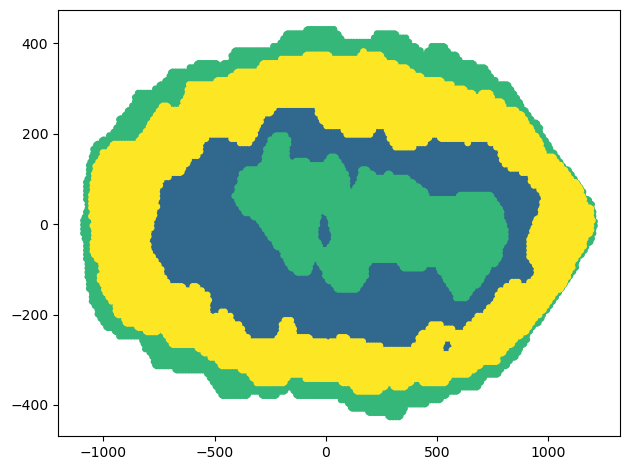

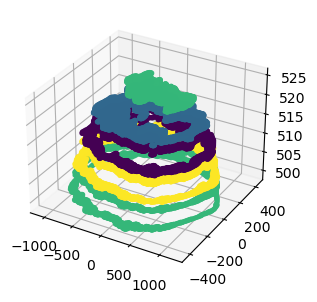

In [7]:
plot_facet_2d(original_xyz)
plot_facet_3d(original_xyz)

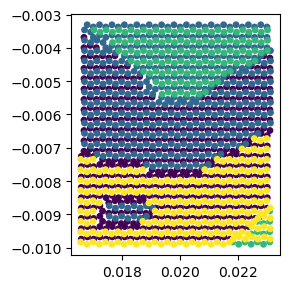

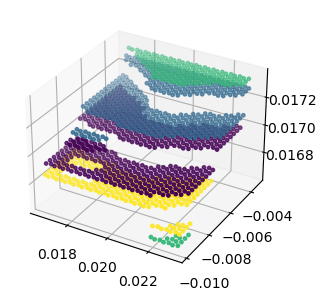

In [8]:
# Plot segments
plot_facet_2d(cut_xyz)
plot_facet_3d(cut_xyz)

In [9]:
print(cut_xyz.shape)

(1354, 4)


Now that our terraces are normalised, what are the unique z-values?

In [10]:
unique_z_values = set(point[3] for point in cut_xyz)

print(len(unique_z_values))
print(unique_z_values)

8
{0.017064637187422935, 0.017138585920975422, 0.01692745022084143, 0.0173497546782098, 0.016853501487288942, 0.01671628146360705, 0.016642332730054565, 0.017275805944657312}
